# Sentiment Analysis on the Berlin State Library Catalog

## Motivation
* In this tutorial, you will learn how to read from a unstructured and structured dataset, create a dataframe from this raw data, and to visualize characteristics from the data in order to find out whether the titles of a research library are truly neutral from a sentiment analysis perspective and how they compare to a sample from books sold by Amazon.

* The sentiment analysis is based on two libraries: [TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis) and [VADER](https://github.com/cjhutto/vaderSentiment) as part of [NLTK](https://www.nltk.org/).

* this time, we will rely on seaborn for the plotting
* https://seaborn.pydata.org/generated/seaborn.set_context.html
* https://elitedatascience.com/python-seaborn-tutorial
* https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

### Preparations and Prerequisities
* This tutorial works on data created by the processPicaPlus script being part of the [StabiHacks](https://github.com/elektrobohemian/StabiHacks). For the sake of simplicity a basic data set is included.

* You should have a basic understanding of Python and pandas dataframe structure.

* We further assume that you already know how to install missing libraries with the help of pip or conda. However, we give advice on how to install some most likely missing libraries and corpora.

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set(font_scale=1.5)

import csv
from textblob import TextBlob


Most likely, [TextBlobDE](https://github.com/markuskiller/textblob-de) will not be installed on your machine. The next two cells will setup the package and download possible missing corpora.

In [2]:
!pip install -U textblob-de

Requirement already up-to-date: textblob-de in /anaconda3/lib/python3.6/site-packages (0.4.3)


In [3]:
!python -m textblob.download_corpora

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[nltk_data] Downloading package brown to /Users/david/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/david/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/david/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/david/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/david/

In [4]:
from textblob_de import TextBlobDE

## Dataset Preparation I - The Berlin State Library Catalog

The next cell takes the output from the processPicaPlus script and loads it into a dataframe.

Depending on the size of the input file, the following creation of the dataframe for further analyzes will take some time.

In [5]:
# create a dictionary for the records
values={"ppn":[],"title":[],"sentiment_polarity":[],"sentiment_subjectivity":[]}
with open('./data/eng_out.txt.secret', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t')
    for row in spamreader:
        # skip empty separator line
        if row:
            if not ppn:
                ppn=row[0]
            # check if we deal with a row containing a title
            if row[1]=="021A":
                # create a TextBlob from the medium's title
                title=TextBlob(row[2])
                values["ppn"].append(ppn)
                values["title"].append(row[2])
                # add the sentiment analysis results to the dataframe
                values["sentiment_polarity"].append(title.sentiment.polarity)
                values["sentiment_subjectivity"].append(title.sentiment.subjectivity)
        else:
            ppn=None
df=pd.DataFrame(values)

In [6]:
df.head()

,ppn,title,sentiment_polarity,sentiment_subjectivity
0,0225904055,Publications of the Clark University Library,0.0,0.000
1,033174418X,APMIS,0.0,0.000
2,0374601534,Developments in Central and East European poli...,0.0,0.125
3,0364441704,The Phoenix Award of the Children's Literature...,0.0,0.000
4,0193162784,Couch on insurance 3d,0.0,0.000


## Analysis

In the next step, you will visualise the distribution of the sentiment polarity and its subjectivity. The sentiment polarity is a score in the range [-1,1] that indicates whether a title's sentiment is negative or positive.

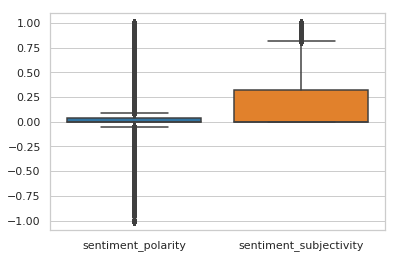

In [9]:
sns.boxplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1027a1550>,
      dtype=object)

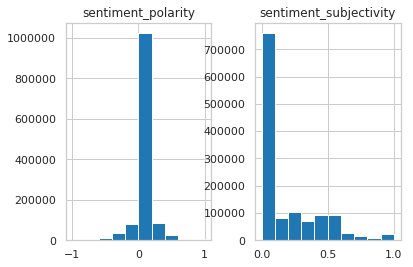

In [10]:
df.hist()

## Dataset Preparation II - The Amazon Books Dataset

The following book dataset can be obtained [here](https://github.com/uchidalab/book-dataset).

As the dataset comes in the structured CSV format, its loading is pretty straight-forward.

In [11]:
df2=pd.read_csv("./data/book32-listing.csv",header=None)
df2.head()

,0,1,2,3,4,5,6
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
2,B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
3,761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
4,1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


In [12]:
df2[6].unique()

array(['Calendars', 'Comics & Graphic Novels', 'Test Preparation',
       'Mystery, Thriller & Suspense', 'Science Fiction & Fantasy',
       'Romance', 'Humor & Entertainment', 'Literature & Fiction',
       'Gay & Lesbian', 'Engineering & Transportation',
       'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home',
       'Arts & Photography', 'Education & Teaching',
       'Parenting & Relationships', 'Self-Help', 'Computers & Technology',
       'Medical Books', 'Science & Math', 'Health, Fitness & Dieting',
       'Business & Money', 'Law', 'Biographies & Memoirs', 'History',
       'Politics & Social Sciences', 'Reference',
       'Christian Books & Bibles', 'Religion & Spirituality',
       'Sports & Outdoors', 'Teen & Young Adult', "Children's Books",
       'Travel'], dtype=object)

As above, we will add the results of the sentiment analysis to the recently read dataframe. Additionally, we will drop all columns of the dataframe we are no longer interested in. This is always a good idea as it saves memory.

In [37]:
def getSentimentPolarity(data):
    txt=TextBlob(data)
    return txt.sentiment.polarity

def getSentimentSubjectivity(data):
    txt=TextBlob(data)
    return txt.sentiment.subjectivity

df2['sentiment_polarity'] = df2[3].apply(getSentimentPolarity)
df2['sentiment_subjectivity'] = df2[3].apply(getSentimentSubjectivity)

df2=df2.drop([1,2,4,5,6], axis=1)
df2.head()

,0,3,sentiment_polarity,sentiment_subjectivity
0,761183272,Mom's Family Wall Calendar 2016,0.000000,0.000000
1,1623439671,Doug the Pug 2016 Wall Calendar,0.000000,0.000000
2,B00O80WC6I,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",0.049206,0.403968
3,761182187,365 Cats Color Page-A-Day Calendar 2016,0.000000,0.000000
4,1578052084,Sierra Club Engagement Calendar 2016,0.000000,0.000000


## Analysis II

In [38]:
df2.shape

(207572, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e04f278>,
      dtype=object)

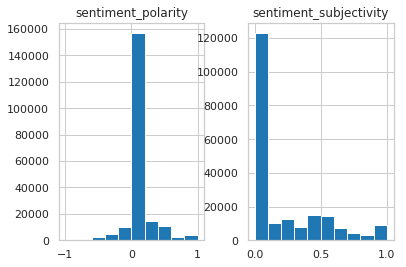

In [14]:
df2[["sentiment_polarity","sentiment_subjectivity"]].hist()

Because the Berlin State library dataset contains much more elements than the Amazon books dataset, we have to take a sample to facilitate comparison.

In [39]:
df3=df.sample(n=200000)
df3.head()

,ppn,title,sentiment_polarity,sentiment_subjectivity
417434,0376125640,Contemporary British fascism the British Natio...,0.055556,0.055556
310421,0318292076,Incomplete L1 acquisition in the immigrant sit...,0.000000,0.000000
582095,0627853471,Lisboa,0.000000,0.000000
618025,0555275760,The ready reckoner; or Trader's useful assista...,0.127976,0.326984
579151,0634052330,"Cirencester, Northleach & District 1898",0.000000,0.000000


In the next cell, we will plot the histograms of both datasets over each other to compare their similarity.

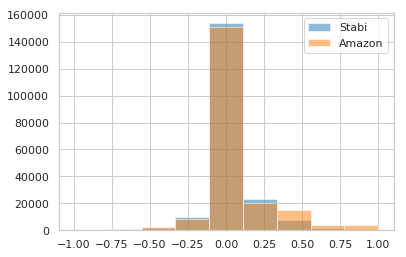

In [40]:
# create bins ranging from -1 to 1 in 10 steps
bins = np.linspace(-1, 1, 10)
# plot both histograms
plt.hist(df3["sentiment_polarity"],bins,alpha=0.5, label='Stabi')
plt.hist(df2["sentiment_polarity"],bins,alpha=0.5, label='Amazon')
plt.legend(loc='upper right')
plt.show()

Interestingly, most titles are neutral indicated by the amount of media in the neutral (0) bin. However, Amazon's media titles tend to be more positive than those of the Berlin State Library.

Let's take a look at the most positive titles from Amazon:

In [43]:
df2[(df2.sentiment_polarity==df2.sentiment_polarity.max())].head()

,0,3,sentiment_polarity,sentiment_subjectivity
30,761183728,Today Is Going to Be a Great Day! Color Page-A...,1.0,0.75
109,1419716093,William Wegman Man's Best Friend 2016 Wall Cal...,1.0,0.30
738,3955704696,Sailing tall Boats (Wonderful World),1.0,1.00
759,3955704688,Regatta (Wonderful World),1.0,1.00
769,3955700984,Sailing Tall Boats 2014 (What a Wonderful World),1.0,1.00


What a wonderful world! Anyhow, Berlin State Library's titles form a new class of positive thinking if you reconsider ["A magnificent fight - The battle for Wake Island"](http://stabikat.de/DB=1/XMLPRS=N/PPN?PPN=165292245)...

In [44]:
df3[(df3.sentiment_polarity==df3.sentiment_polarity.max())].head()

,ppn,title,sentiment_polarity,sentiment_subjectivity
738141,0553262106,"Markham's farewel to husbandry, or, The enrich...",1.0,0.3
521145,0534940102,The best training-ground for archaeologists Fr...,1.0,0.3
651304,0552764086,The paradise of daintie deuises containyng sun...,1.0,1.0
326090,0165292245,A magnificent fight the battle for Wake Island,1.0,1.0
896755,0554515326,The poetical works of Nicholas Rowe. With the ...,1.0,1.0


For the sake of completeness, we will also look at the most negative book titles.

In [45]:
df2[(df2.sentiment_polarity==df2.sentiment_polarity.min())].head()

,0,3,sentiment_polarity,sentiment_subjectivity
3993,61862975,Gris Grimly's Frankenstein,-1.0,1.0
5078,1421539896,"Naruto: 3-in-1 Edition, Vol. 1 (Uzumaki Naruto...",-1.0,1.0
5421,1401253385,Forever Evil,-1.0,1.0
5498,1770462147,The Owner's Manual to Terrible Parenting,-1.0,1.0
8571,316349933,Career of Evil (Cormoran Strike),-1.0,1.0


In [46]:
df3[(df3.sentiment_polarity==df3.sentiment_polarity.min())].head()

,ppn,title,sentiment_polarity,sentiment_subjectivity
1255660,074229644X,"Evil after Postmodernism Histories, Narratives...",-1.0,1.0
707212,055293500X,The cruel assault of Gods fort,-1.0,1.0
814628,0551924551,"Scythian friendship displayed or, a picture fo...",-1.0,1.0
658702,0552850705,Philochasander and Elanira the faire lady of B...,-1.0,1.0
734618,0553224654,A terrible out-cry against the loytering exalt...,-1.0,1.0


* first, download the lexicon for [VADER](https://github.com/cjhutto/vaderSentiment), a sentiment analyzer

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/david/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


In [17]:
ss = sid.polarity_scores("this is great work!")
ss

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}

In [18]:
ss

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}